https://www.kaggle.com/shrutimehta/nasa-asteroids-classification?select=Raw_Data_JSON

Data Source: The data has been collected from the NASA Open API available here The data is about Asteroids - NeoWs NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

Dimension:4687*40

Size:2.4 MB

Data Types:

Data Type Number of columns ID 2 Continuous 30 Categorical 2 DateTime 2 Nominal 1 Raw Data: API

Transformed/Wrangled data: Comma Separated Values(.csv)

---------------------------------------

Los asteroides cercanos a la Tierra y de gran tamaño tienen el peligro potencial de causar la destrucción de áreas densamente pobladas. Las colisiones de asteroides peligrosos ocurre en promedio cada unos 200 o 300 años. Por esa razón, la IAU mantiene un registro de objetos que pueden llegar a colisionar con la Tierra. Actualmente se han identificado más de dos mil de estos objetos, aunque se estima que el número de objetos desconocidos podrı́a duplicar o triplicar esa cantidad. Resulta fundamental, entonces, distinguir los objetos potencialmente peligrosos de los que no lo son. Para eso se pueden usar cálculos detallados de mecánica celeste, o bien se pueden generar modelos empı́ricos que aprendan de los datos disponibles y adquieran la capacidad de clasificar nuevos objetos según su grado de peligrosidad.

En este trabajo se propone clasificar objetos cercanos a la Tierra según sean peligrosos o no. Para ello, se usaran los datos del Center for Near Earth Object Studies (CNEOS) de la NASA, para construir modelos de aprendizaje supervisado capaces de llevar a cabo esta clasificación.

In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
import numpy as np
import pandas as pd

import requests
import json,os,datetime
import csv
from pandas import DataFrame
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import os

# Lectura y preprocesamiento de datos

Para empezar es necesario realizar un pre-procesamiento de datos en el cual se exploran y limpian. Esta parte es la más importante y costosa, ya que lo valioso son los datos pues el modelo aprenderá de ellos.

Se leen los datos como un Data Frame de pandas, y en este caso las filas muestran los asteroides (datos) y las columnas a las características (features).

In [3]:
data = pd.read_csv("nasa.csv")

In [4]:
data.head() #muestra primeros 5 elementos

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [5]:
data.shape #número defilas y columnas

(4687, 40)

Se ve que hay 4687 asteroides y 40 columnas.

In [6]:
data.keys() #nombre de columnas (también funciona con data.columns)

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

Analizando las columnas se puede notar que 'Neo Reference ID', 'Name' y 'Orbit Determination Date' no aportan información importante sobre la peligrosidad de los asteroides. Además 'Est Dia (min/max)', 'Relative Velocity', 'Miss Dist.'  aparecen en distintas unidades por lo que resultan redundantes y deberían eliminarse, dejando alguna de las columnas en una sola unidad.

Utilizando la función **unique()** se obtienen los valores únicos de alguna columna. Esto sirve para verificar los valores del equinoxio 'Equinox' y del cuerpo alrededor del que orbitan los asteroires 'Orbiting Body' que siempre son lo mismo, por lo que no dan información.

In [7]:
data['Orbiting Body'].unique()     #siempre es la tierra -> no da informacion

array(['Earth'], dtype=object)

In [8]:
data['Equinox'].unique()     #siempre lo mismo

array(['J2000'], dtype=object)

Para eliminar las columnas que no son informativas, se utiliza **"drop"**, con la opción 'inplace=True' para reescribir el data frame.

In [9]:
data.drop(columns=['Neo Reference ID','Equinox','Name','Orbiting Body',
                   'Est Dia in M(min)', 'Est Dia in M(max)',
           'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
           'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
           'Relative Velocity km per hr', 'Miles per hour',
           'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)',
           'Orbit Determination Date'], inplace=True)

In [10]:
data.shape #ahora hay 24 columnas

(4687, 24)

Ahora se analiza la completitud de los datos, para ello se ve el largo de cada columna:

In [12]:
#largo de cada columna
for col in data.columns:
    print('Length of column'+" "+col+"=",len(data[col]))

Length of column Absolute Magnitude= 4687
Length of column Est Dia in KM(min)= 4687
Length of column Est Dia in KM(max)= 4687
Length of column Close Approach Date= 4687
Length of column Epoch Date Close Approach= 4687
Length of column Relative Velocity km per sec= 4687
Length of column Miss Dist.(Astronomical)= 4687
Length of column Orbit ID= 4687
Length of column Orbit Uncertainity= 4687
Length of column Minimum Orbit Intersection= 4687
Length of column Jupiter Tisserand Invariant= 4687
Length of column Epoch Osculation= 4687
Length of column Eccentricity= 4687
Length of column Semi Major Axis= 4687
Length of column Inclination= 4687
Length of column Asc Node Longitude= 4687
Length of column Orbital Period= 4687
Length of column Perihelion Distance= 4687
Length of column Perihelion Arg= 4687
Length of column Aphelion Dist= 4687
Length of column Perihelion Time= 4687
Length of column Mean Anomaly= 4687
Length of column Mean Motion= 4687
Length of column Hazardous= 4687


Todas las columnas tienen la misma cantidad de asteroides: 4687, por lo que los datos están completos.

Ahora se ve si alguno es Null:

In [13]:
isnull = data.isnull() #devuelve una nueva tabla, dice si la celda es nula o no

In [14]:
isnull.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Si es falso significa que no es null (tiene un valor).
Para verificar si todos ellos tienen Nulls, se cuenta cuántos hay por cada columna:

In [15]:
for col in isnull.columns:
    print('Number of NULLS: '+" "+col+"=",sum(isnull[col]))

Number of NULLS:  Absolute Magnitude= 0
Number of NULLS:  Est Dia in KM(min)= 0
Number of NULLS:  Est Dia in KM(max)= 0
Number of NULLS:  Close Approach Date= 0
Number of NULLS:  Epoch Date Close Approach= 0
Number of NULLS:  Relative Velocity km per sec= 0
Number of NULLS:  Miss Dist.(Astronomical)= 0
Number of NULLS:  Orbit ID= 0
Number of NULLS:  Orbit Uncertainity= 0
Number of NULLS:  Minimum Orbit Intersection= 0
Number of NULLS:  Jupiter Tisserand Invariant= 0
Number of NULLS:  Epoch Osculation= 0
Number of NULLS:  Eccentricity= 0
Number of NULLS:  Semi Major Axis= 0
Number of NULLS:  Inclination= 0
Number of NULLS:  Asc Node Longitude= 0
Number of NULLS:  Orbital Period= 0
Number of NULLS:  Perihelion Distance= 0
Number of NULLS:  Perihelion Arg= 0
Number of NULLS:  Aphelion Dist= 0
Number of NULLS:  Perihelion Time= 0
Number of NULLS:  Mean Anomaly= 0
Number of NULLS:  Mean Motion= 0
Number of NULLS:  Hazardous= 0


Todas tienen cero nulls.
Por lo que se vió que los datos no tienen faltantes ni incompletitudes.

Se ve que tipo de dato hay en cada columna:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Close Approach Date           4687 non-null   object 
 4   Epoch Date Close Approach     4687 non-null   int64  
 5   Relative Velocity km per sec  4687 non-null   float64
 6   Miss Dist.(Astronomical)      4687 non-null   float64
 7   Orbit ID                      4687 non-null   int64  
 8   Orbit Uncertainity            4687 non-null   int64  
 9   Minimum Orbit Intersection    4687 non-null   float64
 10  Jupiter Tisserand Invariant   4687 non-null   float64
 11  Epoch Osculation              4687 non-null   float64
 12  Eccentricity                  4687 non-null   float64
 13  Sem

Se nota que 'Close Approach Date' es de tipo object: devuelve un string (entre comillas), no es una fecha ni un numero, sino un texto.

In [17]:
data['Close Approach Date'][0] 

'1995-01-01'

Se utiliza 'datetime' para transformarlo en un número entero que indique la diferencia entre el día de la fecha y un día de referencia: 1 de enero de 1950: 

In [18]:
from datetime import datetime 
ref = datetime.strptime('1950-01-01', '%Y-%m-%d') #le doy un string y le enseño el formato para que lo separe y convierta en días
dates = []
for d in data['Close Approach Date']:
    day = datetime.strptime(d, '%Y-%m-%d')
    dif = (day - ref).days          #cantidad de días respecto de un día de referencia (ref)
    dates.append(dif)

In [19]:
dates[0] 

16436

In [20]:
data['Close Approach Date'] = dates #enteros que me dicen la cantidad de dias que pasaron desde 1-enero-1950

Al volver a preguntar que tipo de dato es:

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Close Approach Date           4687 non-null   int64  
 4   Epoch Date Close Approach     4687 non-null   int64  
 5   Relative Velocity km per sec  4687 non-null   float64
 6   Miss Dist.(Astronomical)      4687 non-null   float64
 7   Orbit ID                      4687 non-null   int64  
 8   Orbit Uncertainity            4687 non-null   int64  
 9   Minimum Orbit Intersection    4687 non-null   float64
 10  Jupiter Tisserand Invariant   4687 non-null   float64
 11  Epoch Osculation              4687 non-null   float64
 12  Eccentricity                  4687 non-null   float64
 13  Sem

Se que ahora todos los datos son enteros o de punto flotante (menos la última columna).

Se ven los rangos de los datos:

In [22]:
data.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,20960.717303,1.179881e+12,13.970811,0.256778,28.300619,3.516962,0.082320,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.369573,0.826391,2293.449636,1.981540e+11,7.293223,0.145798,38.299668,3.078307,0.090300,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.001011,0.002260,16436.000000,7.889472e+11,0.335504,0.000178,1.000000,0.000000,0.000002,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.033462,0.074824,19059.000000,1.015574e+12,8.432865,0.133420,9.000000,0.000000,0.014585,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.110804,0.247765,21229.000000,1.203062e+12,12.917889,0.265029,16.000000,3.000000,0.047365,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.253837,0.567597,22994.000000,1.355558e+12,18.077649,0.384154,31.000000,6.000000,0.123593,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,15.579552,34.836938,24357.000000,1.473318e+12,44.633747,0.499884,611.000000,9.000000,0.477891,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


Ahora se analiza si está balanceada la muestra de asteroides peligrosos y no peligrosos. Para ello se utiliza la colunna 'Hazardous' que tiene valores True (peligroso) y False (no peligroso).

In [23]:
data['Hazardous'].values

array([ True, False,  True, ..., False, False, False])

In [24]:
print(f"Number of hazardous asteroids: {sum(data['Hazardous'].values == True)}")
print(f"Number of non-hazardous asteroids: {sum(data['Hazardous'].values == False)}")

Number of hazardous asteroids: 755
Number of non-hazardous asteroids: 3932


Se puede ver que hay muchos más asteroides no peligrosos que peligrosos. Esto hay que tenerlo en cuenta para aplicar los algoritmos de machine learning.

Otra cosa que se puede hacer para conocer los datos es graficar histogramas de los distintos features, separando los peligrosos de los que no lo son.

In [25]:
h = (data['Hazardous'].values == True) #peligrosos

- Magnitud absoluta

Text(0, 0.5, 'dN/dM')

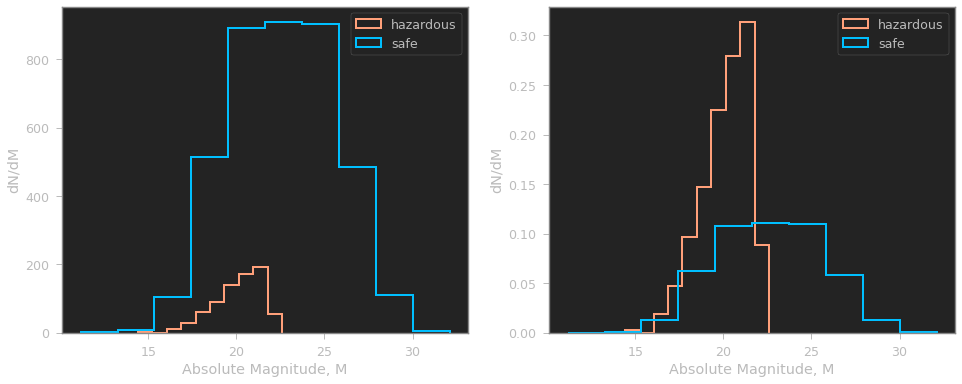

In [26]:
#version sin normalizar y normalizada
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

ax[0].hist(data['Absolute Magnitude'][h], label='hazardous',  #subconjunto de la magnitud absoluta que tenga h true
           histtype='step', color='lightsalmon', linewidth=2)
ax[0].hist(data['Absolute Magnitude'][~h], label='safe',      #no h es V --> h es falso
           histtype='step', color='deepskyblue', linewidth=2)
ax[0].legend()
ax[0].set_xlabel('Absolute Magnitude, M')
ax[0].set_ylabel('dN/dM')

ax[1].hist(data['Absolute Magnitude'][h], label='hazardous',
           histtype='step', density=True, color='lightsalmon', linewidth=2)        #normalizados
ax[1].hist(data['Absolute Magnitude'][~h], label='safe',
           density=True, histtype='step', color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel('Absolute Magnitude, M')
ax[1].set_ylabel('dN/dM')

Se ve que si M>23 aprox, siempre los asteroides son no peligrosos.

- Diametro estimado

Se analiza como se comporta el diámetro estimado (min) y (max):

In [27]:
data['Est Dia in KM(min)'] / data['Est Dia in KM(max)']

0       0.447214
1       0.447214
2       0.447214
3       0.447214
4       0.447214
          ...   
4682    0.447214
4683    0.447214
4684    0.447214
4685    0.447214
4686    0.447214
Length: 4687, dtype: float64

El cociente entre max y min siempre es el mismo número, por lo que no es un intervalo de confianza sino que es un rango fijo. Esto también es redundante, se puede eliminar cualquiera de los 2. Se elimina el max:

In [28]:
data.drop(columns=['Est Dia in KM(max)'], inplace=True) #queda el mínimo

In [29]:
data.shape

(4687, 23)

Text(0, 0.5, 'dN/dd')

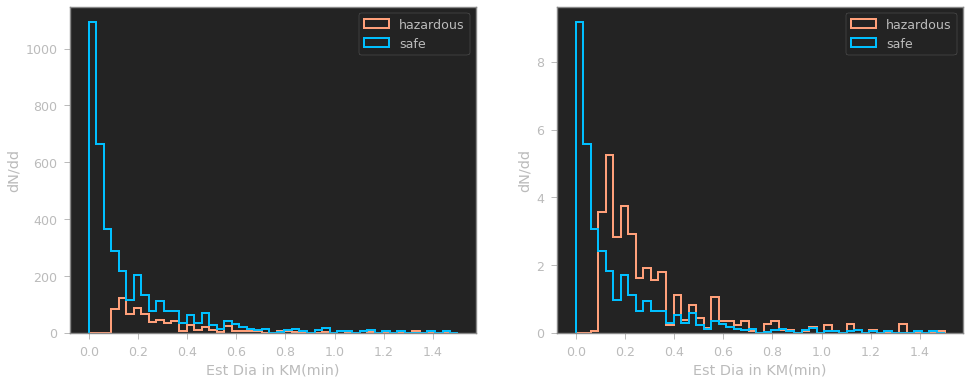

In [30]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

field = 'Est Dia in KM(min)'
b = np.linspace(0, 1.5, 50)
ax[0].hist(data[field][h], label='hazardous', histtype='step', bins=b,   #evaluado en h
                    color='lightsalmon', linewidth=2)
ax[0].hist(data[field][~h], label='safe', histtype='step', bins=b,       #evaluado en no h
                    color='deepskyblue', linewidth=2)

ax[0].legend()
ax[0].set_xlabel(field)
ax[0].set_ylabel('dN/dd')

ax[1].hist(data[field][h], label='hazardous', histtype='step', bins=b, density=True,
           color='lightsalmon', linewidth=2)
ax[1].hist(data[field][~h], label='safe', histtype='step', bins=b, density=True,
           color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel(field)
ax[1].set_ylabel('dN/dd')

Ahora ya no es fácil separar con un valor uno que no es peligroso de uno que si

- Velocidad relativa en km/s

Text(0, 0.5, 'dN/dd')

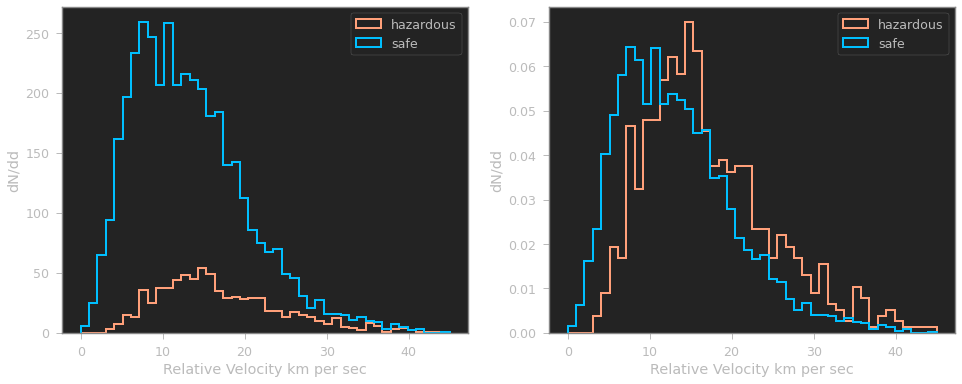

In [31]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

field = 'Relative Velocity km per sec'
b = np.linspace(0, 45, 45)
ax[0].hist(data[field][h], label='hazardous', histtype='step', bins=b,   #evaluado en h
                    color='lightsalmon', linewidth=2)
ax[0].hist(data[field][~h], label='safe', histtype='step', bins=b,       #evaluado en no h
                    color='deepskyblue', linewidth=2)

ax[0].legend()
ax[0].set_xlabel(field)
ax[0].set_ylabel('dN/dd')

ax[1].hist(data[field][h], label='hazardous', histtype='step', bins=b, density=True,
           color='lightsalmon', linewidth=2)
ax[1].hist(data[field][~h], label='safe', histtype='step', bins=b, density=True,
           color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel(field)
ax[1].set_ylabel('dN/dd')

Tampoco es obvio que hay un valor que separa peligrosos de no peligrosos.

- Miss Dist

Text(0, 0.5, 'dN/dd')

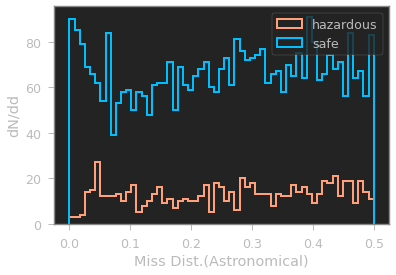

In [32]:
field = 'Miss Dist.(Astronomical)'  #no sabe qué es
b = np.linspace(0, 0.5, 60)
plt.hist(data[field][h], label='hazardous', histtype='step', bins=b,
         color='lightsalmon', linewidth=2)
plt.hist(data[field][~h], label='safe', histtype='step', bins=b,
         color='deepskyblue', linewidth=2)
plt.legend()
plt.xlabel(field)
plt.ylabel('dN/dd')

No hay diferencia entre las dos clases

- Intersección mínima de la órbita

Text(0, 0.5, 'dN/dd')

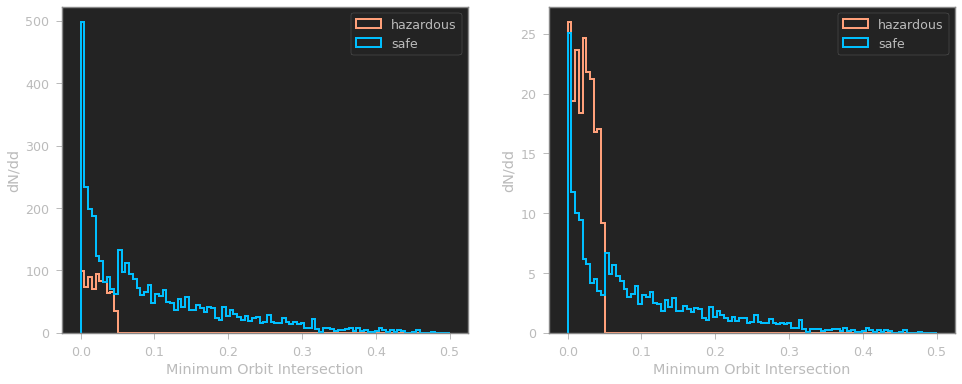

In [33]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

field = 'Minimum Orbit Intersection'
b = np.linspace(0, 0.5, 100)
ax[0].hist(data[field][h], label='hazardous', histtype='step', bins=b,
           color='lightsalmon', linewidth=2)
ax[0].hist(data[field][~h], label='safe', histtype='step', bins=b,
           color='deepskyblue', linewidth=2)
ax[0].legend()
ax[0].set_xlabel(field)
ax[0].set_ylabel('dN/dd')

ax[1].hist(data[field][h], label='hazardous', histtype='step', bins=b, density=True,
           color='lightsalmon', linewidth=2)
ax[1].hist(data[field][~h], label='safe', histtype='step', bins=b, density=True,
           color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel(field)
ax[1].set_ylabel('dN/dd')

Se puede proponer un valor para el cual es fácil distinguir los que no son peligrosos de los que si. Si un valor es mayor que cierto valor fijo (aprox 0.5) uno puede estar seguro que es no peligroso.

- Inclinación

Text(0, 0.5, 'dN/dd')

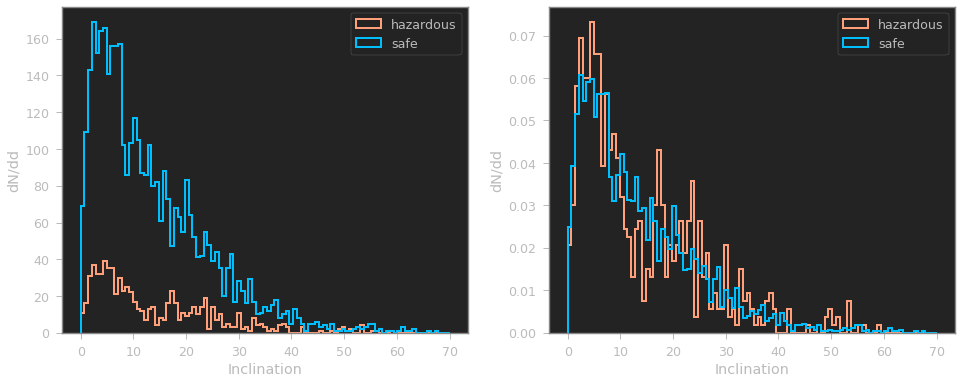

In [34]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

field = 'Inclination'
b = np.linspace(0, 70, 100)
ax[0].hist(data[field][h], label='hazardous', histtype='step', bins=b,
           color='lightsalmon', linewidth=2)
ax[0].hist(data[field][~h], label='safe', histtype='step', bins=b,
           color='deepskyblue', linewidth=2)
ax[0].legend()
ax[0].set_xlabel(field)
ax[0].set_ylabel('dN/dd')

ax[1].hist(data[field][h], label='hazardous', histtype='step', bins=b, density=True,
           color='lightsalmon', linewidth=2)
ax[1].hist(data[field][~h], label='safe', histtype='step', bins=b, density=True,
           color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel(field)
ax[1].set_ylabel('dN/dd')


- Período orbital

Text(0, 0.5, '1/N dN/dd')

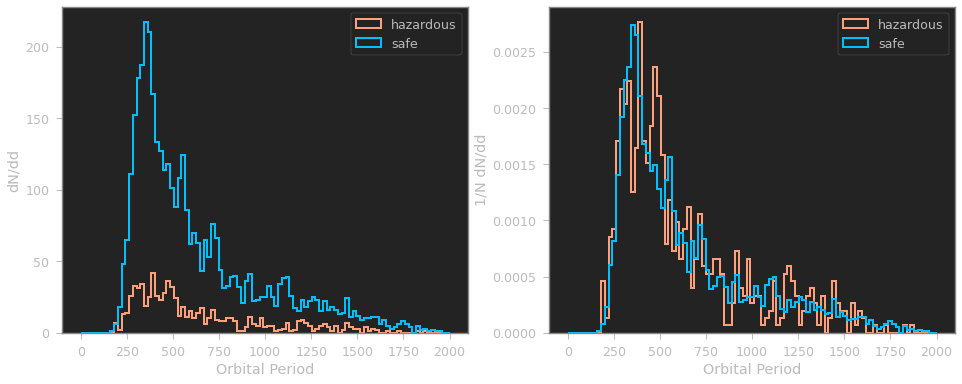

In [35]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

field = 'Orbital Period'
b = np.linspace(0, 2000, 100)
ax[0].hist(data[field][h], label='hazardous', histtype='step', bins=b,
           color='lightsalmon', linewidth=2)
ax[0].hist(data[field][~h], label='safe', histtype='step', bins=b,
           color='deepskyblue', linewidth=2)
ax[0].legend()
ax[0].set_xlabel(field)
ax[0].set_ylabel('dN/dd')

ax[1].hist(data[field][h], label='hazardous', histtype='step', bins=b, density=True,
           color='lightsalmon', linewidth=2)
ax[1].hist(data[field][~h], label='safe', histtype='step', bins=b, density=True,
           color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel(field)
ax[1].set_ylabel('1/N dN/dd')

Otros gráficos que se pueden hacer:

- Magnitud vs intersección mínima orbital

Se los grafica en la misma escala para poder comparar.

Text(0.5, 1.0, 'SAFE')

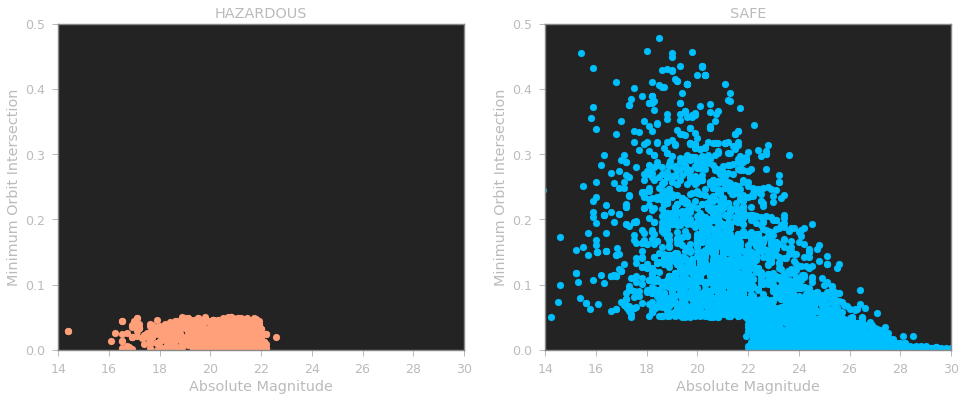

In [36]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

ax[0].scatter(data['Absolute Magnitude'][h], data['Minimum Orbit Intersection'][h], color='lightsalmon')
ax[0].set_xlabel('Absolute Magnitude')
ax[0].set_ylabel('Minimum Orbit Intersection')
ax[0].set_xlim(14,30)
ax[0].set_ylim(0,0.5)
ax[0].set_title('HAZARDOUS')

ax[1].scatter(data['Absolute Magnitude'][~h], data['Minimum Orbit Intersection'][~h], color='deepskyblue')
ax[1].set_xlabel('Absolute Magnitude')
ax[1].set_ylabel('Minimum Orbit Intersection')
ax[1].set_xlim(14,30)
ax[1].set_ylim(0,0.5)
ax[1].set_title('SAFE')

Estos parámetros resultan muy útiles para distinguir asteroides peligrosos de no peligrosos. Se puede tomar un criterio en el cual si un asteroide cae en el cuadradito es peligroso y si cae afuera no.

- Diámetro estimado vs intersección mínima orbital

Text(0.5, 1.0, 'SAFE')

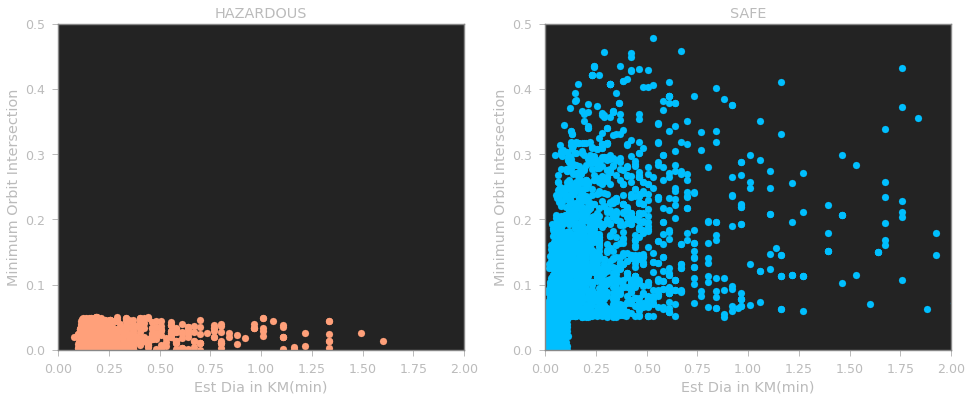

In [37]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

ax[0].scatter(data['Est Dia in KM(min)'][h], data['Minimum Orbit Intersection'][h], color='lightsalmon')   #evalua en h
ax[0].set_xlabel('Est Dia in KM(min)')
ax[0].set_ylabel('Minimum Orbit Intersection')
ax[0].set_xlim(0, 2)
ax[0].set_ylim(0, 0.5)
ax[0].set_title('HAZARDOUS')

ax[1].scatter(data['Est Dia in KM(min)'][~h], data['Minimum Orbit Intersection'][~h], color='deepskyblue')   #evalua en no h
ax[1].set_xlabel('Est Dia in KM(min)')
ax[1].set_ylabel('Minimum Orbit Intersection')
ax[1].set_xlim(0, 2)
ax[1].set_ylim(0, 0.5)
ax[1].set_title('SAFE')

Con el análisis anterior se puede ver que los distintos features influyen de distintas formas en la clasificación de los asteroides, algunos en mayor medida que otros. Para saber cual de ellos tiene mayor importancia se propone en la sección siguiente realizar una reducción de dimensionalidad.

Sin embargo, cabe destacar que solamente analizando el problema físico y los datos, se logró limpiar los datos bastante, pasando de 40 columnas a 23. Se guarda estos datos limpios en un archivo:

In [38]:
data.to_csv('clean_data.csv', index=False)

In [39]:
data.shape #Se tienen 4687 asteroides y 23 columnas

(4687, 23)

# Reducción de dimensionalidad

Cuando el número de dimensiones es muy grande algunos algoritmos pueden funcionar mal. Conviene, antes de usarlos, reducir la dimensionalidad como en este caso.

Si deseamos reducir la cantidad de features (es decir, la cantidad de ejes) que se utilizan para describir estos datos (para una representación más compacta), entonces se pueden rotar los ejes para alinearlos con esta correlación. Cualquier rotación conserva el orden relativo o la configuración de los datos, por lo que se elige una rotación para maximizar la capacidad de discriminar entre los puntos de datos. Esto se logra si la rotación maximiza la varianza a lo largo de los ejes resultantes (es decir, definiendo el primer eje para que sea la dirección con varianza máxima, el segundo cortogonal al primero que maximiza la varianza residual, y así). Esta técnica de reducción de dimensionalidad se conoce como análisis de componentes principales (PCA). 

 PCA es una transformación lineal, basada en la rotacion en el espacio de dimensiones, aplicada a datos multivariados, que define un conjunto de ejes no correlacionados ordenados por la varianza de cada nuevo eje.
 
En este trabajo se va a aplicar PCA para reducir la dimensionalidad usando el paquete 'decomposition' de sklearn. El módulo incluye algoritmos de descomposición matricial, como PCA, NMF o ICA. PCA se implementa como un objeto transformador que aprende componentes en su método 'fit' y se puede usar en nuevos datos para proyectarlos en estos componentes.

Para empezar hay que realizar la separación entre los features y las etiquetas. La columna 'Hazardous' que se vió en data es la etiqueta y se debe sacar para la clasificación.

In [40]:
labels = np.array(data['Hazardous']) #etiqueta

In [41]:
labels

array([ True, False,  True, ..., False, False, False])

Se transforma a una variable numérica: se define 'y' que tiene lo mismo que 'labels' pero lo que antes era False y True se convierte en 0 y 1 respectivamente:

In [42]:
y = [1 if L else 0 for L in labels]

Se define la nueva variable X de los features sin la columna 'Hazardous'. Así data mantiene la etiqueta pero X no:

In [43]:
X = data.drop(columns=['Hazardous'])

In [44]:
X.shape

(4687, 22)

PCA:

In [45]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)  #se queda con las n coordenadas mas importantes
pca.fit(X)                               #le paso los datos- entrenamiento
print('Varianzas:', pca.explained_variance_ratio_)  
R = pca.transform(X)                     #se aplica

Varianzas: [1.]


En la línea del print se ve un valor representivo para la varianza de cada feature. Mientras más grande el número, más importante es el nuevo feature. Los nuevos features están ordenados en importancia.

Se probaron con varios valores de n_components pero siempre el primer feature daba 1 mientras que el resto valores muy cercanos a 0 (orden e-17). Con un solo feature practicamente se explica casi toda la variación en el espacio de features, por eso se toma n_components=1.

R es el resultado de aplicar PCA, se obtiene un nuevo conjunto de datos pero con menos dimensiones, solamente 1 feature contra los 22 iniciales.

In [46]:
R

array([[ 3.90933384e+11],
       [ 3.90933384e+11],
       [ 3.90328584e+11],
       ...,
       [-2.93437416e+11],
       [-2.93437416e+11],
       [-2.93437416e+11]])

In [47]:
R.shape  #numero de asteroides x nuevos features

(4687, 1)

Si bien se redujo la dimensión, ya no se tienen los features originales sino uno nuevo que es alguna combinación lineal de los originales, por lo que se sacrificó interpretabilidad,

# Random Forest Regression

Para la clasificación de los asteroides se utiliza el algoritmo de Random Forest, que es un método de aprendizaje para clasificación, regresión y otras tareas que operan mediante la construcción de una multitud de árboles de decisión con su respectivo entrenamiento y dando salida a la clasificación promedio de los árboles individuales.

Como ya se tienen los features y las etiquetas por separado, se arman los conjuntos de datos de entrenamiento y test tanto para los features como para las etiquetas. Primero se realiza con los features originales (X) y luego con los features nuevos después de la reducción de dimensionalidad.

Para conocer cómo el algoritmo clasifica los puntos de datos se utilizan métricas para tener una medida de qué tan bien funciona el clasificador. Se realizará el cálculo de la "accuracy" del algoritmo (número de verdaderos positivos y verdaderos negativos dividido por el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos) y se mostrará la curva ROC.

- Features originales (X)

In [48]:
from sklearn.model_selection import train_test_split

res = train_test_split(X, y, test_size = 0.25, random_state = 42)
train_features, test_features, train_labels, test_labels = res

print(test_features.shape) #25% del total
print(train_features.shape)
print(X.shape)

(1172, 22)
(3515, 22)
(4687, 22)


In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42) #clasificador
rf.fit(train_features, train_labels)    #entrenamiento
predictions = rf.predict(test_features) #predicción

In [50]:
predictions

array([1., 0., 1., ..., 0., 0., 0.])

In [51]:
#accuracy
errors = abs(predictions - test_labels)
#los VP y VN van a tener un error aprox a cero, y el total es la muestra 'test'
print('Accuracy=', np.sum(errors < 1.e-5)/ len(test_labels))

Accuracy= 0.9718430034129693


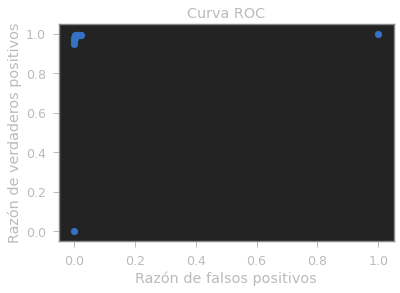

In [52]:
#curva ROC
from sklearn.metrics import roc_curve
a, b, c = roc_curve(test_labels, predictions)
plt.scatter(a, b)
plt.title('Curva ROC')
plt.xlabel('Razón de falsos positivos')
plt.ylabel('Razón de verdaderos positivos')
plt.show()

Se encuentra que el algoritmo tiene una alta accuracy, cercana a 1, y la curva ROC da muy bien.

- Features luego de reducir la dimensiolidad (R)

In [53]:
R.shape

(4687, 1)

In [54]:
res2 = train_test_split(R, y, test_size = 0.25, random_state = 42)
train_features2, test_features2, train_labels2, test_labels2 = res2

print(test_features2.shape)
print(train_features2.shape)
print(R.shape)

(1172, 1)
(3515, 1)
(4687, 1)


In [55]:
rf2 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf2.fit(train_features2, train_labels2)
predictions2 = rf2.predict(test_features2)

In [56]:
#accuracy
errors2 = abs(predictions2 - test_labels2)
print('Accuracy=', np.sum(errors2 < 1.e-5)/ len(test_labels2))

Accuracy= 0.27986348122866894


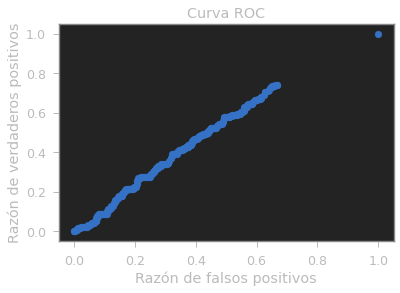

In [57]:
#curva ROC
a2, b2, c2 = roc_curve(test_labels2, predictions2)
plt.scatter(a2, b2)
plt.title('Curva ROC')
plt.xlabel('Razón de falsos positivos')
plt.ylabel('Razón de verdaderos positivos')
plt.show()

Para este caso se encuentra que el algoritmo pierde capacidad de clasificación, esto puede ser por que al disminuir las dimensiones y quedarse con las de mayor dispersión puede coincidir con los features que permiten clasificar.

## Conclusiones

En este trabajo se aplica todo lo aprendido en la materia Astrometría para clasificar objetos cercanos a la Tierra según sean peligrosos o no. Para llevar a cabo esta clasificación se busca construir modelos de aprendizaje supervisado. Pero antes de ello, se debe realizar otras tareas, como un pre-procesamiento de los datos para limpiarlos, conocerlos y tratar de disminuir dimensiones, y en el caso de que aún queden muchos features realizar una reducción de dimensionalidad, a costa de perder interpretabilidad de los datos. 

En este caso se aplicó la reducción de dimensionalidad con PCA reduciendo el problema a 1 dimensión que ampliamente mostraba más dispersión que el resto de las dimensiones. Luego, se aplica el algoritmo de aprendizaje Forest Random para realizar la clasificación definiendo el correspondiente conjunto de entrenamiento y 'testeo'. Por medio de las métricas accuracy y curva ROC se mide la capacidad de clasificación del algoritmo, encontrando buenos resultados para los features originales y no así para los features reducidos.